In [3]:
import os, os.path
import json
import ast
from pandas import json_normalize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


import re
import cv2

# Read and transform original data for visualization

In [4]:
directory = 'MC2-Image-Data/'
dir = '../VAST2020mc2/MC2-Image-Data'

In [4]:
file_list = []
caption_list = []
text_list = []
img_list = []
img_paths = []
for root, dirs, files in os.walk(directory):
    for file in files:
        if file.endswith('.csv'):
            file_list.append(os.path.abspath(root)+ '/' + file)
        if 'caption.txt' in file:
            caption_list.append(os.path.abspath(root)+ '/' + file)
        if 'text' in file:
            text_list.append(os.path.abspath(root) + '/' + file)
        if file.endswith('.jpg'):
            img_paths.append(os.path.abspath(root) + '/' + file)
            img_list.append(file)
# caption_list
img = pd.DataFrame(img_list)
img.columns =['Image']
img.head()

,Image
0,Person33_5.jpg
1,Person33_4.jpg
2,Person33_60.jpg
3,Person33_48.jpg
4,Person33_6.jpg


In [15]:
# for root, dirs, files in os.walk(dir):
#     for file in files:
#         if 'bbox' in file:
#             print(file)
#             img = cv2.imread(os.path.join('/Users/jaywang/Documents/TTU_study/VAST2020mc2/MC2-Image-Data', file))
# #             cv2.imwrite('/Users/jaywang/Documents/TTU_study/VAST2020_MC2/bbox',file)
#             cv2.imwrite(os.path.join('/Users/jaywang/Documents/TTU_study/VAST2020_MC2/bbox', file), img)

In [114]:
len(img_list)

907

In [115]:
# img_list

In [5]:
len(file_list)

907

In [7]:
# file_list

In [118]:
# img_paths

In [119]:
# img['PersonId'] = img['Image'].apply(lambda x: x.split('_')[0][6:])
img['ImageId'] = img['Image'].apply(lambda x: x.split('.')[0][6:])
img.head()

,Image,ImageId
0,Person33_5.jpg,33_5
1,Person33_4.jpg,33_4
2,Person33_60.jpg,33_60
3,Person33_48.jpg,33_48
4,Person33_6.jpg,33_6


In [120]:
# text_list

In [121]:
def read_csv(path):
    df = pd.read_csv(path, encoding= 'unicode_escape',dtype=str)
    df['PersonId'] = os.path.split(path)[1].split('_')[0][6:]
    df['ImageId'] = os.path.split(path)[1].split('.')[0][6:]
    return df

def read_txt(path, colName):
    df = pd.read_csv(path, sep='\t', encoding= 'unicode_escape', header=None, names=[colName])
    name = os.path.split(path)[1]
    if 'text' in name:
        df['TextId'] = name[6:-4]
    else:
#         df['PersonId'] = os.path.split(path)[1].split('_')[0][6:]
        df['ImageId'] = os.path.split(path)[1].split('.')[0][6:-7]
    return df

In [122]:
cap_list = []
txt_list = []
for file in caption_list:
    cap_df = read_txt(file, 'Caption')
    cap_list.append(cap_df)
for file in text_list:
    txt_list.append(read_txt(file, 'Text'))
cap = pd.concat(cap_list).reset_index(drop=True)
txt = pd.concat(txt_list).reset_index(drop=True)

In [123]:
cap.head()

,Caption,ImageId
0,Tortoise racing for life,33_42
1,Be the pop of color that can illuminate the mo...,33_17
2,Tortoise at Gym building Muscles,33_31
3,Rolling dice in a stable position,33_53
4,The things are not always where you think they...,33_1


In [124]:
txt.head()

,Text,TextId
0,You come home to find a single lit pink candle...,35_text3
1,Green turtles are a good investment Buy now!,35_text2
2,This trophy is a good prize for my win in HotS,35_text1
3,The benefit of the maple leaf pencil is that y...,35_text5
4,My cats enjoyed playing soccer with this eyeba...,35_text4


In [125]:
# im_cap = pd.merge(cap, img, how='outer', on='ImageId')
# im_cap

In [126]:
# cap.to_json('caption.json', orient='records')
# txt.to_json('text.json', orient='records')

In [127]:
df_list = []
for file in file_list:
    df = read_csv(file)
    df_list.append(df)
# df_list

In [128]:
concat_df = pd.concat(df_list).reset_index(drop=True)
concat_df.shape

(4491, 8)

In [293]:
concat_df.head(10)

,x,y,Width,Height,Score,Label,PersonId,ImageId
0,377.0,202.0,1237,1502,0.31465,cloudSign,33,33_40
1,2003.0,515.0,296,1361,0.48349,pinkCandle,33,33_40
2,229.0,273.0,2137,1825,0.34838,pumpkinNotes,33,33_40
3,1560.0,111.0,1210,2127,0.36762,sign,33,33_40
4,515.0,565.0,1341,2608,0.29639,birdCall,33,33_54
5,666.0,1143.0,1482,2514,0.29539,pumpkinNotes,33,33_54
6,797.0,1748.0,1200,1398,0.31314,redWhistle,33,33_54
7,11.0,269.0,1089,3750,0.47006,sign,33,33_54
8,1422.0,2366.0,1250,1680,0.32090,silverStraw,33,33_54
9,595.0,1143.0,1170,861,0.27061,blueSunglasses,33,33_54


In [221]:
new_conc = concat_df.copy()
new_conc

,x,y,Width,Height,Score,Label,PersonId,ImageId
0,377.0,202.0,1237,1502,0.31465,cloudSign,33,33_40
1,2003.0,515.0,296,1361,0.48349,pinkCandle,33,33_40
2,229.0,273.0,2137,1825,0.34838,pumpkinNotes,33,33_40
3,1560.0,111.0,1210,2127,0.36762,sign,33,33_40
4,515.0,565.0,1341,2608,0.29639,birdCall,33,33_54
...,...,...,...,...,...,...,...,...
4486,416.0,6.0,464,662,0.25546,pumpkinNotes,15,15_3
4487,476.0,224.0,328,1382,0.61677,sign,15,15_3
4488,4.0,6.0,600,934,0.30253,noisemaker,15,15_1
4489,636.0,763.0,540,843,0.31760,pumpkinNotes,15,15_1


In [222]:
new_conc['index'] = new_conc["ImageId"].apply(lambda x: int(x.replace("_","")))
new_conc= new_conc.sort_values(by='index')
new_conc.reset_index(drop=True)
new_conc.drop(columns=['level_0', 'index'])

In [294]:
new_conc.head(20)

,level_0,x,y,Width,Height,Score,Label,PersonId,ImageId,index
0,2872,1479.0,11.0,1922,1583,0.33861,birdCall,1,1_1,11
1,2877,14.0,464.0,1775,2268,0.38394,yellowBag,1,1_1,11
2,2876,1560.0,1301.0,1197,615,0.32564,blueSunglasses,1,1_1,11
3,2875,14.0,666.0,1465,2309,0.42683,pumpkinNotes,1,1_1,11
4,2874,1855.0,1724.0,578,1079,0.34569,pinkCandle,1,1_1,11
5,2873,2554.0,313.0,955,888,0.28139,eyeball,1,1_1,11
6,2880,3320.0,1150.0,578,938,0.33001,pinkCandle,1,1_2,12
7,2882,2984.0,242.0,1062,2712,0.42644,sign,1,1_2,12
8,2881,1775.0,968.0,1291,857,0.28935,redWhistle,1,1_2,12
9,2878,1828.0,414.0,1210,1492,0.26762,cloudSign,1,1_2,12


In [295]:

new_conc = new_conc.drop(columns=['index', 'level_0'])
new_conc

,x,y,Width,Height,Score,Label,PersonId,ImageId
0,1479.0,11.0,1922,1583,0.33861,birdCall,1,1_1
1,14.0,464.0,1775,2268,0.38394,yellowBag,1,1_1
2,1560.0,1301.0,1197,615,0.32564,blueSunglasses,1,1_1
3,14.0,666.0,1465,2309,0.42683,pumpkinNotes,1,1_1
4,1855.0,1724.0,578,1079,0.34569,pinkCandle,1,1_1
...,...,...,...,...,...,...,...,...
4486,1055.0,795.0,1953,1602,0.30762,birdCall,40,40_10
4487,1884.0,1176.0,985,1291,0.30588,cloudSign,40,40_10
4488,847.0,1556.0,1590,1544,0.58092,redWhistle,40,40_10
4489,1279.0,957.0,1521,1371,0.48834,hairClip,40,40_10


In [296]:
new_conc.to_json('new_data.json',orient='records')

In [131]:
concat_df["ImageId"].value_counts()

13_27    13
13_1     13
32_12    13
25_23    12
35_8     12
         ..
40_7      1
36_2      1
11_13     1
5_27      1
23_56     1
Name: ImageId, Length: 894, dtype: int64

In [132]:
columns = ['x','y','Width','Height','Score']
for col in columns:
    try:
        concat_df[col] = pd.to_numeric(concat_df[col], errors='coerce')
#         concat_df[col].astype('str').astype('int')

    except:
        pass

In [133]:
concat_df.dtypes

x           float64
y           float64
Width         int64
Height        int64
Score       float64
Label        object
PersonId     object
ImageId      object
dtype: object

In [134]:
concat_df['x'].sum()

5745028.0

In [ ]:
# concat_df.to_json('data_resized.json', orient='records')

# Transform original data and perform PCA

In [32]:
pivoted = concat_df.pivot(index="ImageId", columns="Label", values="Score").astype(np.float).fillna(0)

In [33]:
pivoted.head(5)

Label,birdCall,blueSunglasses,canadaPencil,cloudSign,cupcakePaper,eyeball,hairClip,lavenderDie,metalKey,noisemaker,...,pinkCandle,pumpkinNotes,redWhistle,sign,silverStraw,stickerBox,trophy,vancouverCards,yellowBag,yellowBalloon
ImageId,,,,,,,,,,,,,,,,,,,,,
10_1,0.0,0.0,0.00000,0.42038,0.00000,0.46997,0.00000,0.0,0.34568,0.0,...,0.44701,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,0.27677,0.0
10_10,0.0,0.0,0.00000,0.00000,0.00000,0.31961,0.00000,0.0,0.00000,0.0,...,0.00000,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,0.40247,0.0
10_11,0.0,0.0,0.00000,0.00000,0.00000,0.39960,0.00000,0.0,0.00000,0.0,...,0.00000,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,0.36124,0.0
10_12,0.0,0.0,0.00000,0.51042,0.27642,0.29295,0.33765,0.0,0.00000,0.0,...,0.38914,0.29994,0.0,0.29704,0.0,0.0,0.0,0.0,0.00000,0.0
10_13,0.0,0.0,0.31585,0.42838,0.00000,0.00000,0.00000,0.0,0.00000,0.0,...,0.27454,0.00000,0.0,0.32945,0.0,0.0,0.0,0.0,0.00000,0.0


In [34]:
pivoted.shape

(894, 22)

In [35]:
# target = pd.DataFrame(['birdCall',
#     'blueSunglasses',
#     'canadaPencil',
#     'cloudSign',
#     'cupcakePaper',
#     'eyeball',
#     'hairClip',
#     'lavenderDie',
#     'metalKey',
#     'noisemaker',
#     'paperPlate',
#     'partyFavor',
#     'pinkCandle',
#     'pumpkinNotes',
#     'redWhistle',
#     'sign',
#     'silverStraw',
#     'stickerBox',
#     'trophy',
#     'vancouverCards',
#     'yellowBag',
#     'yellowBalloon'], columns=["Label"])


In [36]:
target =pd.DataFrame(pivoted.index)
target

,ImageId
0,10_1
1,10_10
2,10_11
3,10_12
4,10_13
...,...
889,9_5
890,9_6
891,9_7
892,9_8


In [37]:
target["ImageId"].dtype

dtype('O')

In [38]:
target.shape

(894, 1)

In [39]:
X = pivoted.to_numpy()
X = StandardScaler().fit_transform(X)

In [231]:
pca = PCA(n_components=2)
X_r = pca.fit_transform(X)
X

array([[-0.71849728, -0.77569225, -0.37860669, ..., -0.09903025,
         0.89281097, -0.17665813],
       [-0.71849728, -0.77569225, -0.37860669, ..., -0.09903025,
         1.59621626, -0.17665813],
       [-0.71849728, -0.77569225, -0.37860669, ..., -0.09903025,
         1.36549709, -0.17665813],
       ...,
       [-0.71849728,  2.6289973 , -0.37860669, ..., -0.09903025,
         1.73057395, -0.17665813],
       [-0.71849728,  2.67992312, -0.37860669, ..., -0.09903025,
         1.52386121, -0.17665813],
       [ 1.66467034,  1.34031015, -0.37860669, ..., -0.09903025,
        -0.65596773, -0.17665813]])

In [232]:
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

explained variance ratio (first two components): [0.11929323 0.08742075]


In [233]:
principalDf = pd.DataFrame(data = X_r
             , columns = ['PC1', 'PC2'])

In [234]:
principalDf.head()

,PC1,PC2
0,0.255095,-1.391252
1,-1.037691,1.151518
2,-0.918923,1.097746
3,0.309705,-0.375672
4,-1.293760,-1.746440


In [235]:
finalDf = pd.concat([principalDf, target], axis = 1)
finalDf.head()

,PC1,PC2,ImageId
0,0.255095,-1.391252,10_1
1,-1.037691,1.151518,10_10
2,-0.918923,1.097746,10_11
3,0.309705,-0.375672,10_12
4,-1.293760,-1.746440,10_13


In [239]:
finalDf["PersonId"] = finalDf.ImageId.apply(lambda x: x.split('_')[0])
finalDf

,PC1,PC2,ImageId,PersonId
0,0.255095,-1.391252,10_1,10
1,-1.037691,1.151518,10_10,10
2,-0.918923,1.097746,10_11,10
3,0.309705,-0.375672,10_12,10
4,-1.293760,-1.746440,10_13,10
...,...,...,...,...
889,-1.313715,-1.122999,9_5,9
890,-0.164897,0.765203,9_6,9
891,0.913705,1.367662,9_7,9
892,3.071216,0.648694,9_8,9


In [40]:
# finalDf.to_json('pca.json', orient='records')

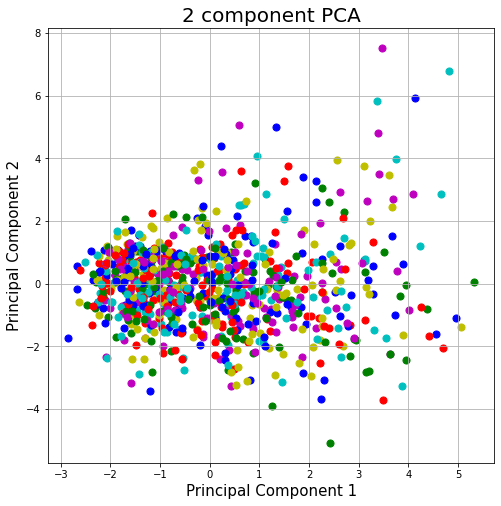

In [238]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
# targets = ['birdCall',
#     'blueSunglasses',
#     'canadaPencil',
#     'cloudSign',
#     'cupcakePaper',
#     'eyeball',
#     'hairClip',
#     'lavenderDie',
#     'metalKey',
#     'noisemaker',
#     'paperPlate',
#     'partyFavor',
#     'pinkCandle',
#     'pumpkinNotes',
#     'redWhistle',
#     'sign',
#     'silverStraw',
#     'stickerBox',
#     'trophy',
#     'vancouverCards',
#     'yellowBag',
#     'yellowBalloon']
targets = target['ImageId']

colors = ['r', 'g', 'b', 'c','m','y'] * 149
#           ,'w','gray','rosybrown','firebrick',
#           'darksalmon','sienna','sandybrown','bisque','tan', 'moccasin', 
#           'gold', 'darkkhaki', 'olivedrab', 'chartreuse','darkgreen','darkcyan'] * 
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['ImageId'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
# ax.legend(targets)
ax.grid()


In [20]:
# df[df['x'].isnull()]

In [21]:
# df

In [22]:
# df.to_json('data_with_cap.json', orient='records')

In [24]:
labels = concat_df.groupby(['Label'],as_index=False).agg({'Score': np.max })['Label']
list(labels)

['birdCall',
 'blueSunglasses',
 'canadaPencil',
 'cloudSign',
 'cupcakePaper',
 'eyeball',
 'hairClip',
 'lavenderDie',
 'metalKey',
 'noisemaker',
 'paperPlate',
 'partyFavor',
 'pinkCandle',
 'pumpkinNotes',
 'redWhistle',
 'sign',
 'silverStraw',
 'stickerBox',
 'trophy',
 'vancouverCards',
 'yellowBag',
 'yellowBalloon']

In [25]:

def missing_ratio(df):
    '''
    INPUT: 
        - df : data frame to check
    OUTPUT: 
        - new_df : new dataframe with counts and ratio of missing values in each category
    '''              
    
    count = df.isnull().sum().sort_values(ascending = False)
    ratio = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    new_df = pd.concat([count, ratio], axis=1, keys=['Count', 'Ratio'])
    return new_df

In [26]:
missing_ratio(concat_df)

,Count,Ratio
x,74,1.647740
y,73,1.625473
ImageId,0,0.000000
PersonId,0,0.000000
Label,0,0.000000
Score,0,0.000000
Height,0,0.000000
Width,0,0.000000


In [27]:
concat_df['Label'].value_counts()

eyeball           501
cloudSign         482
sign              465
pinkCandle        415
blueSunglasses    352
birdCall          324
yellowBag         286
pumpkinNotes      271
hairClip          231
lavenderDie       200
redWhistle        181
cupcakePaper      135
metalKey          134
canadaPencil      116
stickerBox         92
partyFavor         91
trophy             68
silverStraw        58
yellowBalloon      30
noisemaker         26
paperPlate         22
vancouverCards     11
Name: Label, dtype: int64

In [28]:
person40 = concat_df[concat_df['PersonId'].str.startswith('40_')]
person40

,x,y,Width,Height,Score,Label,PersonId,ImageId


In [29]:
# im = cv2.imread('MC2-Image-Data/Person1/Person1_1.jpg')
# gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

In [30]:
# crop = gray[1310: 1586, 1502: 2258]
# cv2.imshow('test', crop)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


In [31]:
concat_df.head()

,x,y,Width,Height,Score,Label,PersonId,ImageId
0,377.0,202.0,1237,1502,0.31465,cloudSign,33,33_40
1,2003.0,515.0,296,1361,0.48349,pinkCandle,33,33_40
2,229.0,273.0,2137,1825,0.34838,pumpkinNotes,33,33_40
3,1560.0,111.0,1210,2127,0.36762,sign,33,33_40
4,515.0,565.0,1341,2608,0.29639,birdCall,33,33_54


In [32]:
concat_df[concat_df["x"].isnull()]

,x,y,Width,Height,Score,Label,PersonId,ImageId
237,NaN,NaN,2299,1360,0.85100,redWhistle,33,33_28
1245,NaN,NaN,1573,1544,0.86190,redWhistle,28,28_6
1246,NaN,NaN,1296,922,0.34825,hairClip,28,28_6
1336,NaN,NaN,2264,1671,0.33267,birdCall,26,26_6
1337,NaN,NaN,415,1141,0.26439,pinkCandle,26,26_6
...,...,...,...,...,...,...,...,...
4448,NaN,NaN,2160,1867,0.54900,pumpkinNotes,15,15_13
4449,NaN,NaN,1919,1521,0.32624,trophy,15,15_13
4450,NaN,NaN,2126,1152,0.46949,blueSunglasses,15,15_13
4451,NaN,NaN,1296,1279,0.46236,hairClip,15,15_13


In [33]:
concat_df[concat_df["y"].isnull()]

,x,y,Width,Height,Score,Label,PersonId,ImageId
237,NaN,NaN,2299,1360,0.85100,redWhistle,33,33_28
1245,NaN,NaN,1573,1544,0.86190,redWhistle,28,28_6
1246,NaN,NaN,1296,922,0.34825,hairClip,28,28_6
1336,NaN,NaN,2264,1671,0.33267,birdCall,26,26_6
1337,NaN,NaN,415,1141,0.26439,pinkCandle,26,26_6
...,...,...,...,...,...,...,...,...
4448,NaN,NaN,2160,1867,0.54900,pumpkinNotes,15,15_13
4449,NaN,NaN,1919,1521,0.32624,trophy,15,15_13
4450,NaN,NaN,2126,1152,0.46949,blueSunglasses,15,15_13
4451,NaN,NaN,1296,1279,0.46236,hairClip,15,15_13


In [34]:
concat_df[concat_df["Width"].isnull()]

,x,y,Width,Height,Score,Label,PersonId,ImageId


In [35]:
concat_df[concat_df["Height"].isnull()]

,x,y,Width,Height,Score,Label,PersonId,ImageId


In [36]:
concat_df[concat_df["ImageId"] == "33_1"].iloc[:, :4].values.tolist()

[[473.0, 197.0, 135.0, 406.0],
 [262.0, 5.0, 142.0, 278.0],
 [312.0, 871.0, 156.0, 376.0],
 [240.0, 13.0, 80.0, 244.0]]

In [37]:
concat_df[concat_df["ImageId"] == "33_1"][["x", "y", "Width", "Height", "Label"]]


,x,y,Width,Height,Label
313,473.0,197.0,135,406,cloudSign
314,262.0,5.0,142,278,eyeball
315,312.0,871.0,156,376,hairClip
316,240.0,13.0,80,244,lavenderDie


In [38]:
cordinates = concat_df[concat_df["ImageId"] == "33_1"][["x", "y", "Width", "Height", "Label"]].values.tolist()   
cordinates

[[473.0, 197.0, 135, 406, 'cloudSign'],
 [262.0, 5.0, 142, 278, 'eyeball'],
 [312.0, 871.0, 156, 376, 'hairClip'],
 [240.0, 13.0, 80, 244, 'lavenderDie']]

In [39]:
concat_df[concat_df["y"].isnull()]

,x,y,Width,Height,Score,Label,PersonId,ImageId
237,NaN,NaN,2299,1360,0.85100,redWhistle,33,33_28
1245,NaN,NaN,1573,1544,0.86190,redWhistle,28,28_6
1246,NaN,NaN,1296,922,0.34825,hairClip,28,28_6
1336,NaN,NaN,2264,1671,0.33267,birdCall,26,26_6
1337,NaN,NaN,415,1141,0.26439,pinkCandle,26,26_6
...,...,...,...,...,...,...,...,...
4448,NaN,NaN,2160,1867,0.54900,pumpkinNotes,15,15_13
4449,NaN,NaN,1919,1521,0.32624,trophy,15,15_13
4450,NaN,NaN,2126,1152,0.46949,blueSunglasses,15,15_13
4451,NaN,NaN,1296,1279,0.46236,hairClip,15,15_13


In [262]:
# d = concat_df.set_index(['PersonId', 'Label'], drop=False)
# d.head()

In [41]:
# d.to_json('h.json', orient='records')

In [42]:
# def crop_image(path, x, y, w, h):
#     """
#     Function to crop an image based on cordinates of bounding box
#     """
#     img = cv2.imread(path)
#     crop = img[y: y+h, x: x+w].copy()
#     cv2.imwrite(save_location, crop)
    
    

In [44]:
# crop_image('MC2-Image-Data/Person2/Person2_3.jpg', 1076, 474, 1035, 1049, 'MC2-Image-Data/test.jpg')
# crop_image('MC2-Image-Data/Person1/Person1_2.jpg', 2984, 242,1062, 2712, 'MC2-Image-Data/test1.jpg')

# Process Image Data

In [44]:
img_paths[0]

'/Users/jaywang/Documents/TTU_study/VAST2020_MC2/MC2-Image-Data/Person33/Person33_5.jpg'

In [ ]:
def crop_image(path,df):
    """
    Function to crop an image based on cordinates of bounding box
    """
    img = cv2.imread(path)
    image_id = os.path.split(path)[1][6:-4]
    # Create a list of cordinate lists with [x, y, width, height]
    cordinates = concat_df[concat_df["ImageId"] == image_id][["x", "y", "Width", "Height", "Label"]].dropna().values.tolist()
    for cord in cordinates:
        x, y, w, h, label = int(cord[0]), int(cord[1]), int(cord[2]), int(cord[3]), cord[4]
        crop = img[y: y+h, x: x+w].copy()
        cv2.imwrite('/Users/jaywang/Documents/TTU_study/VAST2020_MC2/MC2-Image-Data/croped/{}-{}.jpg'.format(image_id, label ), crop)

In [ ]:
# for path in img_paths:
#     crop_image(path, concat_df)

In [ ]:
# crop_image('/Users/jaywang/Documents/TTU_study/VAST2020_MC2/MC2-Image-Data/Person10/Person10_1.jpg',concat_df
# )

In [ ]:
# To append a rectangle to an image
# import cv2

# cv2.rectangle(img, (x1, y1), (x2, y2), (255,0,0), 2)
# cv2.imwrite("my.png",img)

# cv2.imshow("lalala", img)
# k = cv2.waitKey(0) # 0==wait forever

# x1,y1 ------
# |          |
# |          |
# |          |
# --------x2,y2

In [52]:
# Example to add a rectangle and label to an image
im = cv2.imread('/Users/jaywang/Documents/TTU_study/VAST2020_MC2/MC2-Image-Data/Person33/Person33_5.jpg')
draw = cv2.rectangle(im, (252, 54),(688, 961), (255, 0, 0), 2)
font = cv2.FONT_HERSHEY_SIMPLEX

t = cv2.putText(draw, '33_5', (252,54), font, 2, (255, 0, 0) ,5, cv2.LINE_AA)
cv2.imwrite('bbox.jpg', draw)

True

In [246]:
def crop_landscape(image, dim):
    r = (dim[0] / image.shape[0]) / (dim[0] / dim[1])
    nw = int(image.shape[1] * r)

    resized = cv2.resize(image, (nw, int(dim[1])), interpolation=cv2.INTER_AREA)

    half_width = int(dim[0]) / 2
    half_shape_width = int(resized.shape[1]) / 2

    start_x = half_shape_width - half_width
    end_x = half_width + half_shape_width
    cropped = resized[0:dim[1], start_x:end_x]

    return cropped

def crop_portrait(image, dim):
    r = dim[1] / image.shape[1] / (dim[1] / dim[0])
    nh = int(image.shape[0] * r)

    resized = cv2.resize(image, (int(dim[0]), nh), interpolation=cv2.INTER_AREA)
    half_height = int(dim[1]) / 2
    half_shape_height = int(resized.shape[0]) / 2

    start_y = half_shape_height - half_height
    end_y = half_height + half_shape_height
    cropped = resized[start_y:end_y, 0:dim[0]]

    return cropped

def create_other_size(image, file_name, dim, location):
  # 1 => width index, 0 => height index
    try:
        if image.shape[0] > image.shape[1]:
            cropped = crop_portrait(image, dim)
        else:
            cropped = crop_landscape(image, dim)

        cv2.imwrite(os.path.join(location, file_name), cropped)

    except Exception as ex:
        pass

In [2]:
output_dir = '/Users/jaywang/Documents/TTU_study/VAST2020_MC2/resized/'
# od = '/Users/jaywang/Documents/TTU_study/trainingImages'

In [7]:
# img_paths

In [267]:
img = cv2.imread('/Users/jaywang/Documents/TTU_study/VAST2020_MC2/MC2-Image-Data/Person33/Person33_5.jpg')
print('Original Dimensions : ',img.shape)

# create_other_size(i, 'Person33_5.jpg', (100.0, 100.0),output_dir)

Original Dimensions :  (1280, 720, 3)


In [278]:
def reduce_size(path, output_dir, scale_percent):
    img = cv2.imread(path)
#     print('Original Dimensions : ',img.shape)
#     scale_percent = 30 # percent of original size
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)
    # resize image
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

#     print('Resized Dimensions : ',resized.shape)

    # cv2.imshow("Resized image", resized)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()
    file_name = os.path.split(path)[1]
    cv2.imwrite(os.path.join(output_dir, file_name), resized)

 

In [279]:
for path in img_paths:
    reduce_size(path, output_dir, 10)

In [264]:
# file_name = '/home/user/picture.jpg'
# output_dir = '/home/user/output/'
# image = cv2.imread(file_name)
# create_other_size(image, file_name, (100.0, 100.0), output_dir)

In [ ]:
# resize example training images(43 images)


# Read and process ground truth data

In [16]:
# Read ground truth data
gt_df = pd.read_csv("data/gt.csv")
gt_df.head()

,ID,DataRow ID,Labeled Data,Label,Created By,Project Name,Created At,Updated At,Seconds to Label,External ID,Agreement,Benchmark Agreement,Benchmark ID,Benchmark Reference ID,Dataset Name,Reviews,View Label
0,ckamnukq44ggy0700m611vb47,ckam1kxzzunxz0blt945shd4f,https://storage.labelbox.com/ckaeu3r68fki00700...,"{""objects"":[{""featureId"":""ckamnfxos0w2k0zbzlua...",guojian0706@gmail.com,Object detection,1.590420e+12,1.590420e+12,360.879,Person37_9.jpg,-1,-1,NaN,NaN,Object detection,[],https://editor.labelbox.com?project=ckam1mc1hp...
1,ckamnvz7x4gqr07006mp1fee7,ckam1kxxyulo70blta89b4a91,https://storage.labelbox.com/ckaeu3r68fki00700...,"{""objects"":[{""featureId"":""ckamnuyr40wqc0zbz59n...",guojian0706@gmail.com,Object detection,1.590420e+12,1.590420e+12,64.935,Person5_41.jpg,-1,-1,NaN,NaN,Object detection,[],https://editor.labelbox.com?project=ckam1mc1hp...
2,ckamnwjoyz9tj0853s8nu5yub,ckam1ky01uo1j0blt35js4bk9,https://storage.labelbox.com/ckaeu3r68fki00700...,"{""objects"":[{""featureId"":""ckamnwhn7106h0zd7l38...",guojian0706@gmail.com,Object detection,1.590420e+12,1.590420e+12,26.130,Person39_1.jpg,-1,-1,NaN,NaN,Object detection,[],https://editor.labelbox.com?project=ckam1mc1hp...
3,ckamnwtvayuhn0738w4rcg9kj,ckam1kxy2ulrr0bltf7ohfk5c,https://storage.labelbox.com/ckaeu3r68fki00700...,{},guojian0706@gmail.com,Object detection,1.590420e+12,1.590420e+12,12.688,Person6_30.jpg,-1,-1,NaN,NaN,Object detection,[],https://editor.labelbox.com?project=ckam1mc1hp...
4,ckamnxc4dh27c0751lz5m99f9,ckam1kxy4ulvb0blt54fk2en1,https://storage.labelbox.com/ckaeu3r68fki00700...,"{""objects"":[{""featureId"":""ckamnx7u610b90zdrjlb...",guojian0706@gmail.com,Object detection,1.590420e+12,1.590420e+12,23.234,Person9_6.jpg,-1,-1,NaN,NaN,Object detection,[],https://editor.labelbox.com?project=ckam1mc1hp...


In [25]:
# parsed_df = pd.concat([json_normalize(json.loads(js)) for js in gt_df['Label']])
# parsed_df.head()

In [17]:
gt = gt_df[['Label', 'External ID']]
gt.head(5)

,Label,External ID
0,"{""objects"":[{""featureId"":""ckamnfxos0w2k0zbzlua...",Person37_9.jpg
1,"{""objects"":[{""featureId"":""ckamnuyr40wqc0zbz59n...",Person5_41.jpg
2,"{""objects"":[{""featureId"":""ckamnwhn7106h0zd7l38...",Person39_1.jpg
3,{},Person6_30.jpg
4,"{""objects"":[{""featureId"":""ckamnx7u610b90zdrjlb...",Person9_6.jpg


In [18]:

# dic = json.loads(gt['Label'][0])['objects']
# g = pd.DataFrame(dic)
# t = g[['title','bbox']]
# t.head()

In [19]:
# t['imageId'] = gt['External ID'].iloc[0]

In [20]:
# t.head()

In [21]:
# gt.shape[0]

In [22]:
def transform_gtdata(gt, i):
    try:
        dic = json.loads(gt['Label'][i])['objects']
        g = pd.DataFrame(dic)
        t = g[['title','bbox']]
        t['imageId'] = gt['External ID'].iloc[i]
        return t
    except KeyError:
        pass
    
    

In [23]:
gt

,Label,External ID
0,"{""objects"":[{""featureId"":""ckamnfxos0w2k0zbzlua...",Person37_9.jpg
1,"{""objects"":[{""featureId"":""ckamnuyr40wqc0zbz59n...",Person5_41.jpg
2,"{""objects"":[{""featureId"":""ckamnwhn7106h0zd7l38...",Person39_1.jpg
3,{},Person6_30.jpg
4,"{""objects"":[{""featureId"":""ckamnx7u610b90zdrjlb...",Person9_6.jpg
...,...,...
902,"{""objects"":[{""featureId"":""ckaoc4nbj0mi810bsubq...",Person34_12.jpg
903,"{""objects"":[{""featureId"":""ckaoc52hu022f0zc6fau...",Person3_24.jpg
904,"{""objects"":[{""featureId"":""ckaoc5p451esp10d7bkj...",Person34_44.jpg
905,"{""objects"":[{""featureId"":""ckaoc5z151et110d7o1b...",Person5_6.jpg


In [24]:
gt_list = []
rows = gt.shape[0]
for i in range(rows):
    g_df = transform_gtdata(gt, i)
    gt_list.append(g_df)

<ipython-input-22-cc1c8d9f1cf0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t['imageId'] = gt['External ID'].iloc[i]


In [25]:
len(gt_list)

907

In [26]:
gt_list[0]

,title,bbox,imageId
0,cloudSign,"{'top': 427, 'left': 288, 'height': 650, 'widt...",Person37_9.jpg
1,noisemaker,"{'top': 335, 'left': 2842, 'height': 2634, 'wi...",Person37_9.jpg
2,noisemaker,"{'top': 335, 'left': 3223, 'height': 2664, 'wi...",Person37_9.jpg
3,paperPlate,"{'top': 298, 'left': 1038, 'height': 888, 'wid...",Person37_9.jpg
4,partyFavor,"{'top': 642, 'left': 2062, 'height': 488, 'wid...",Person37_9.jpg
5,redDart,"{'top': 1545, 'left': 2163, 'height': 379, 'wi...",Person37_9.jpg
6,hairRoller,"{'top': 1536, 'left': 1529, 'height': 355, 'wi...",Person37_9.jpg
7,gyroscope,"{'top': 1571, 'left': 364, 'height': 316, 'wid...",Person37_9.jpg


In [27]:
for df in gt_list:
    gt_concat = pd.concat(gt_list).reset_index(drop=True)

In [28]:
gt_concat.head()

,title,bbox,imageId
0,cloudSign,"{'top': 427, 'left': 288, 'height': 650, 'widt...",Person37_9.jpg
1,noisemaker,"{'top': 335, 'left': 2842, 'height': 2634, 'wi...",Person37_9.jpg
2,noisemaker,"{'top': 335, 'left': 3223, 'height': 2664, 'wi...",Person37_9.jpg
3,paperPlate,"{'top': 298, 'left': 1038, 'height': 888, 'wid...",Person37_9.jpg
4,partyFavor,"{'top': 642, 'left': 2062, 'height': 488, 'wid...",Person37_9.jpg


In [29]:
gt_concat.shape

(1358, 3)

In [30]:
gt_concat['ImageId'] = gt_concat['imageId'].apply(lambda x: x.split('.')[0][6:])
gt_concat['PersonId'] = gt_concat['ImageId'].apply(lambda x: x.split('_')[0])
gt_concat.drop(columns='imageId',axis=1,inplace=True)

gt_concat.head(5)

,title,bbox,ImageId,PersonId
0,cloudSign,"{'top': 427, 'left': 288, 'height': 650, 'widt...",37_9,37
1,noisemaker,"{'top': 335, 'left': 2842, 'height': 2634, 'wi...",37_9,37
2,noisemaker,"{'top': 335, 'left': 3223, 'height': 2664, 'wi...",37_9,37
3,paperPlate,"{'top': 298, 'left': 1038, 'height': 888, 'wid...",37_9,37
4,partyFavor,"{'top': 642, 'left': 2062, 'height': 488, 'wid...",37_9,37


In [31]:
gt_concat['Label'] = gt_concat['title']


In [32]:
gt_concat.head(5)

,title,bbox,ImageId,PersonId,Label
0,cloudSign,"{'top': 427, 'left': 288, 'height': 650, 'widt...",37_9,37,cloudSign
1,noisemaker,"{'top': 335, 'left': 2842, 'height': 2634, 'wi...",37_9,37,noisemaker
2,noisemaker,"{'top': 335, 'left': 3223, 'height': 2664, 'wi...",37_9,37,noisemaker
3,paperPlate,"{'top': 298, 'left': 1038, 'height': 888, 'wid...",37_9,37,paperPlate
4,partyFavor,"{'top': 642, 'left': 2062, 'height': 488, 'wid...",37_9,37,partyFavor


In [33]:
gt_concat.drop(columns='title', axis=1, inplace=True)

In [34]:
# gt_bbox = pd.DataFrame(gt_concat['bbox'][0])
# gt_bbox.head()
dic_list = gt_concat.bbox.values.tolist()
type(dic_list)

list

In [35]:
cord = pd.DataFrame.from_dict(dic_list)
cord.head(5)

,top,left,height,width
0,427,288,650,672
1,335,2842,2634,730
2,335,3223,2664,763
3,298,1038,888,1000
4,642,2062,488,688


In [36]:
gt_final = pd.concat([cord, gt_concat], axis=1)
gt_final.head()

,top,left,height,width,bbox,ImageId,PersonId,Label
0,427,288,650,672,"{'top': 427, 'left': 288, 'height': 650, 'widt...",37_9,37,cloudSign
1,335,2842,2634,730,"{'top': 335, 'left': 2842, 'height': 2634, 'wi...",37_9,37,noisemaker
2,335,3223,2664,763,"{'top': 335, 'left': 3223, 'height': 2664, 'wi...",37_9,37,noisemaker
3,298,1038,888,1000,"{'top': 298, 'left': 1038, 'height': 888, 'wid...",37_9,37,paperPlate
4,642,2062,488,688,"{'top': 642, 'left': 2062, 'height': 488, 'wid...",37_9,37,partyFavor


In [37]:
gt_final.drop(columns='bbox', axis=1, inplace=True)
gt_final.head(5)

,top,left,height,width,ImageId,PersonId,Label
0,427,288,650,672,37_9,37,cloudSign
1,335,2842,2634,730,37_9,37,noisemaker
2,335,3223,2664,763,37_9,37,noisemaker
3,298,1038,888,1000,37_9,37,paperPlate
4,642,2062,488,688,37_9,37,partyFavor


In [38]:
gt_final.rename(columns={'top': 'y', 'left': 'x', 'width': 'Width', 'height': 'Height', 'ImageId':'ImageId', 
                        'PersonId': 'PersonId', 'Label': 'Label'}, inplace=True)
gt_final.head(5)

,y,x,Height,Width,ImageId,PersonId,Label
0,427,288,650,672,37_9,37,cloudSign
1,335,2842,2634,730,37_9,37,noisemaker
2,335,3223,2664,763,37_9,37,noisemaker
3,298,1038,888,1000,37_9,37,paperPlate
4,642,2062,488,688,37_9,37,partyFavor


In [ ]:
gt_final.va

In [8]:
# # Save gt data to file
# gt_final.to_json('gt.json', orient='records')

# read_gt = pd.read_json('data/gt_pca.json')
# read_gt.head()

,PC1,PC2,ImageId,PersonId
0,2.425866,2.589567,101,10
1,-0.238974,0.102713,1010,10
2,-0.238974,0.102713,1011,10
3,-0.020471,-0.932401,1012,10
4,-0.020471,-0.932401,1013,10


In [ ]:
def transform_bboxdata(gt, i):
    try:
        dic = json.loads(gt_concat['bbox'][i])
        dic_df = pd.DataFrame(dic)
        t = dic_df[['title','bbox']]
        t['imageId'] = gt['External ID'].iloc[i]
        return t
    except KeyError:
        pass
    

In [277]:
gt_final['Score'] = 1
gt_final

,y,x,Height,Width,ImageId,PersonId,Label,Score
0,427,288,650,672,37_9,37,cloudSign,1
1,335,2842,2634,730,37_9,37,noisemaker,1
2,335,3223,2664,763,37_9,37,noisemaker,1
3,298,1038,888,1000,37_9,37,paperPlate,1
4,642,2062,488,688,37_9,37,partyFavor,1
...,...,...,...,...,...,...,...,...
1353,1386,2776,242,324,34_44,34,turtle,1
1354,1972,1508,524,362,5_6,5,legoBracelet,1
1355,1712,1940,232,629,5_6,5,redWhistle,1
1356,781,2564,330,682,5_6,5,pinkEraser,1


In [280]:
gt_pca = gt_final.copy()
gt_pca.head()

,y,x,Height,Width,ImageId,PersonId,Label,Score
0,427,288,650,672,37_9,37,cloudSign,1
1,335,2842,2634,730,37_9,37,noisemaker,1
2,335,3223,2664,763,37_9,37,noisemaker,1
3,298,1038,888,1000,37_9,37,paperPlate,1
4,642,2062,488,688,37_9,37,partyFavor,1


In [281]:
# gt_pca

In [282]:
gt_drop = gt_pca.drop_duplicates(subset=['PersonId','ImageId','Label'])
gt_drop

,y,x,Height,Width,ImageId,PersonId,Label,Score
0,427,288,650,672,37_9,37,cloudSign,1
1,335,2842,2634,730,37_9,37,noisemaker,1
3,298,1038,888,1000,37_9,37,paperPlate,1
4,642,2062,488,688,37_9,37,partyFavor,1
5,1545,2163,379,351,37_9,37,redDart,1
...,...,...,...,...,...,...,...,...
1353,1386,2776,242,324,34_44,34,turtle,1
1354,1972,1508,524,362,5_6,5,legoBracelet,1
1355,1712,1940,232,629,5_6,5,redWhistle,1
1356,781,2564,330,682,5_6,5,pinkEraser,1


In [287]:
gt_pivoted = pd.pivot(gt_drop, index="ImageId", columns="Label", values="Score").astype(np.float).fillna(0)
gt_pivoted


Label,birdCall,blueSunglasses,brownDie,cactusPaper,canadaPencil,carabiner,cloudSign,cowbell,cupcakePaper,eyeball,...,sign,silverStraw,spiderRing,stickerBox,trophy,turtle,vancouverCards,voiceRecorder,yellowBag,yellowBalloon
ImageId,,,,,,,,,,,,,,,,,,,,,
10_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10_10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10_11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10_12,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10_13,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9_5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9_6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9_7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [290]:

target =pd.DataFrame(gt_pivoted.index)


def pca(df, n_comp):
    X = df.to_numpy()
    X = StandardScaler().fit_transform(X)
    pca = PCA(n_components=n_comp)
    X_r = pca.fit_transform(X)
    principalDf = pd.DataFrame(data = X_r
                 , columns = ['PC1', 'PC2'])
    finalDf = pd.concat([principalDf, target], axis = 1)
    finalDf["PersonId"] = finalDf.ImageId.apply(lambda x: x.split('_')[0])
    return finalDf

In [291]:
gt_pca_final = pca(gt_pivoted, 2)
gt_pca_final

,PC1,PC2,ImageId,PersonId
0,2.425866,2.589567,10_1,10
1,-0.238974,0.102713,10_10,10
2,-0.238974,0.102713,10_11,10
3,-0.020471,-0.932401,10_12,10
4,-0.020471,-0.932401,10_13,10
...,...,...,...,...
843,-0.155635,-0.860175,9_5,9
844,0.987420,0.583177,9_6,9
845,0.987420,0.583177,9_7,9
846,1.746886,-0.562569,9_8,9


In [292]:

# gt_pca_final.to_json('gt_pca.json', orient='records')

In [ ]:
def plot_pca(df):
    
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)
 
    targets = target['ImageId']

    colors = ['r', 'g', 'b', 'c','m','y'] * 149
    #           ,'w','gray','rosybrown','firebrick',
    #           'darksalmon','sienna','sandybrown','bisque','tan', 'moccasin', 
    #           'gold', 'darkkhaki', 'olivedrab', 'chartreuse','darkgreen','darkcyan'] * 
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf['ImageId'] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
                   , finalDf.loc[indicesToKeep, 'PC2']
                   , c = color
                   , s = 50)
    # ax.legend(targets)
    ax.grid()



# Concat ground truth data and original data

In [135]:
c_df = concat_df.copy()
c_df.head()

,x,y,Width,Height,Score,Label,PersonId,ImageId
0,377.0,202.0,1237,1502,0.31465,cloudSign,33,33_40
1,2003.0,515.0,296,1361,0.48349,pinkCandle,33,33_40
2,229.0,273.0,2137,1825,0.34838,pumpkinNotes,33,33_40
3,1560.0,111.0,1210,2127,0.36762,sign,33,33_40
4,515.0,565.0,1341,2608,0.29639,birdCall,33,33_54


In [139]:
c_df['Height'].sum()

5623746

In [140]:
c_df.rename(columns={'x': 'x_p', 'y': 'y_p', 'Width': 'Width_p', 'Height': 'Height_p', 'ImageId':'ImageId', 
                        'PersonId': 'PersonId', 'Label': 'Label'}, inplace=True)
c_df.head()

,x_p,y_p,Width_p,Height_p,Score,Label,PersonId,ImageId
0,377.0,202.0,1237,1502,0.31465,cloudSign,33,33_40
1,2003.0,515.0,296,1361,0.48349,pinkCandle,33,33_40
2,229.0,273.0,2137,1825,0.34838,pumpkinNotes,33,33_40
3,1560.0,111.0,1210,2127,0.36762,sign,33,33_40
4,515.0,565.0,1341,2608,0.29639,birdCall,33,33_54


In [142]:
new_df = pd.merge(gt_final, c_df, how='outer', on=['Label','ImageId','PersonId'])

In [143]:
new_df.head()

,y,x,Height,Width,ImageId,PersonId,Label,x_p,y_p,Width_p,Height_p,Score
0,427.0,288.0,650.0,672.0,37_9,37,cloudSign,NaN,NaN,NaN,NaN,NaN
1,335.0,2842.0,2634.0,730.0,37_9,37,noisemaker,NaN,NaN,NaN,NaN,NaN
2,335.0,3223.0,2664.0,763.0,37_9,37,noisemaker,NaN,NaN,NaN,NaN,NaN
3,298.0,1038.0,888.0,1000.0,37_9,37,paperPlate,NaN,NaN,NaN,NaN,NaN
4,642.0,2062.0,488.0,688.0,37_9,37,partyFavor,NaN,NaN,NaN,NaN,NaN


In [156]:
new_df = new_df.replace(np.nan, 0)

In [157]:
# columns = ['x_p', 'y_p', 'Width_p', 'Height_p', 'Score']
# for col in columns:
#     pd.to_numeric(new_df[col], errors='coerce')

In [158]:
new_df.head()

,y,x,Height,Width,ImageId,PersonId,Label,x_p,y_p,Width_p,Height_p,Score,IoU
0,427.0,288.0,650.0,672.0,37_9,37,cloudSign,0.0,0.0,0.0,0.0,0.0,0.0
1,335.0,2842.0,2634.0,730.0,37_9,37,noisemaker,0.0,0.0,0.0,0.0,0.0,0.0
2,335.0,3223.0,2664.0,763.0,37_9,37,noisemaker,0.0,0.0,0.0,0.0,0.0,0.0
3,298.0,1038.0,888.0,1000.0,37_9,37,paperPlate,0.0,0.0,0.0,0.0,0.0,0.0
4,642.0,2062.0,488.0,688.0,37_9,37,partyFavor,0.0,0.0,0.0,0.0,0.0,0.0


In [159]:
new_df.shape

(5539, 13)

In [160]:
new_df['x'].sum()

1881271.0

In [161]:
new_df['x_p'].dtypes

dtype('float64')

In [200]:
def IOU(df):
    # determining the minimum and maximum -coordinates of the intersection rectangle
    xmin_inter = max(df.x, df.x_p)
    ymin_inter = max(df.y, df.y_p)
    xmax_inter = min(df.x + df.Width, df.x_p + df.Width_p)
    ymax_inter = min(df.y + df.Height, df.y_p + df.Height_p)
 
    # calculate area of intersection rectangle
    inter_area = max(0, xmax_inter - xmin_inter + 1) * max(0, ymax_inter - ymin_inter + 1)
 
    # calculate area of actual and predicted boxes
    actual_area = (df.Width + 1) * (df.Height + 1)
    pred_area = (df.Width_p + 1) * (df.Height_p + 1)
 
    # computing intersection over union
    iou = inter_area / float(actual_area + pred_area - inter_area)
 
    # return the intersection over union value
    return iou

In [150]:
# # creating a evaluation table
# eval_table = pd.DataFrame()
# eval_table['Label'] = new_df.Label

# #applying IOU function over each image in the dataframe
# eval_table['IOU'] = new_df.apply(IOU, axis = 1)

In [152]:
# eval_table

,Label,IOU
0,cloudSign,NaN
1,noisemaker,NaN
2,noisemaker,NaN
3,paperPlate,NaN
4,partyFavor,NaN
...,...,...
5534,birdCall,NaN
5535,pinkCandle,NaN
5536,pumpkinNotes,NaN
5537,pumpkinNotes,NaN


In [201]:
new_df['IoU'] = new_df.apply(IOU, axis=1)

In [24]:
# new_df

In [203]:
new_df['IoU'].sum()

108.93108608932472

In [204]:
new_df[new_df['IoU']>0.5].shape

(90, 17)

In [169]:
# creating column 'TP/FP' which will store TP for True positive and FP for False positive
# if IOU is greater than 0.5 then TP else FP
new_df['TP/FP'] = new_df['IoU'].apply(lambda x: 'TP' if x>=0.5 else 'FP')

In [205]:
new_df.head()

,y,x,Height,Width,ImageId,PersonId,Label,x_p,y_p,Width_p,Height_p,Score,IoU,TP/FP,Precision,Recall,IP
0,427.0,288.0,650.0,672.0,37_9,37,cloudSign,0.0,0.0,0.0,0.0,0.0,0.0,FP,0.0,0.0,0.0
1,335.0,2842.0,2634.0,730.0,37_9,37,noisemaker,0.0,0.0,0.0,0.0,0.0,0.0,FP,0.0,0.0,0.0
2,335.0,3223.0,2664.0,763.0,37_9,37,noisemaker,0.0,0.0,0.0,0.0,0.0,0.0,FP,0.0,0.0,0.0
3,298.0,1038.0,888.0,1000.0,37_9,37,paperPlate,0.0,0.0,0.0,0.0,0.0,0.0,FP,0.0,0.0,0.0
4,642.0,2062.0,488.0,688.0,37_9,37,partyFavor,0.0,0.0,0.0,0.0,0.0,0.0,FP,0.0,0.0,0.0


In [171]:
# calculating Precision and recall

Precision = []
Recall = []

TP = FP = 0
FN = len(new_df['TP/FP']== 'TP')
for index , row in new_df.iterrows():     
    
    if row.IoU > 0.5:
        TP =TP+1
    else:
        FP =FP+1    
    

    try:
        
        AP = TP/(TP+FP)
        Rec = TP/(TP+FN)
    except ZeroDivisionError:
        
        AP = Recall = 0.0
    
    Precision.append(AP)
    Recall.append(Rec)


new_df['Precision'] = Precision
new_df['Recall'] = Recall

In [172]:
new_df.head()

,y,x,Height,Width,ImageId,PersonId,Label,x_p,y_p,Width_p,Height_p,Score,IoU,TP/FP,Precision,Recall
0,427.0,288.0,650.0,672.0,37_9,37,cloudSign,0.0,0.0,0.0,0.0,0.0,0.0,FP,0.0,0.0
1,335.0,2842.0,2634.0,730.0,37_9,37,noisemaker,0.0,0.0,0.0,0.0,0.0,0.0,FP,0.0,0.0
2,335.0,3223.0,2664.0,763.0,37_9,37,noisemaker,0.0,0.0,0.0,0.0,0.0,0.0,FP,0.0,0.0
3,298.0,1038.0,888.0,1000.0,37_9,37,paperPlate,0.0,0.0,0.0,0.0,0.0,0.0,FP,0.0,0.0
4,642.0,2062.0,488.0,688.0,37_9,37,partyFavor,0.0,0.0,0.0,0.0,0.0,0.0,FP,0.0,0.0


In [186]:
new_df[(new_df['Precision'] >= 0.1)]

,y,x,Height,Width,ImageId,PersonId,Label,x_p,y_p,Width_p,Height_p,Score,IoU,TP/FP,Precision,Recall
12,113.0,1406.0,426.0,1041.0,9_6,9,blueSunglasses,1385.0,101.0,995.0,434.0,0.39308,0.885471,TP,0.153846,0.000361
13,728.0,862.0,2213.0,1754.0,10_12,10,cactusPaper,0.0,0.0,0.0,0.0,0.00000,0.000000,FP,0.142857,0.000361
14,959.0,2181.0,289.0,333.0,11_20,11,giftBag,0.0,0.0,0.0,0.0,0.00000,0.000000,FP,0.133333,0.000361
15,537.0,1452.0,407.0,499.0,13_7,13,birdCall,0.0,0.0,0.0,0.0,0.00000,0.000000,FP,0.125000,0.000361
16,73.0,463.0,575.0,482.0,14_2,14,cloudSign,0.0,0.0,0.0,0.0,0.00000,0.000000,FP,0.117647,0.000361
17,542.0,1830.0,1374.0,135.0,16_2,16,plaidPencil,0.0,0.0,0.0,0.0,0.00000,0.000000,FP,0.111111,0.000361
18,785.0,1008.0,153.0,130.0,17_24,17,rubiksCube,0.0,0.0,0.0,0.0,0.00000,0.000000,FP,0.105263,0.000361
19,1682.0,1018.0,553.0,211.0,17_56,17,rainbowPens,0.0,0.0,0.0,0.0,0.00000,0.000000,FP,0.100000,0.000361
22,222.0,976.0,579.0,938.0,22_6,22,blueSunglasses,938.0,81.0,948.0,659.0,0.28812,0.677230,TP,0.130435,0.000541
23,1193.0,1267.0,785.0,401.0,22_6,22,foamDart,0.0,0.0,0.0,0.0,0.00000,0.000000,FP,0.125000,0.000541


In [188]:
#calculating Interpolated Precision
# It is simply the highest precision value for a certain recall level. 
# For example if we have same recall value 0.2 for three different precision
# values 0.87, 0.76 and 0.68 then interpolated precision for all three recall values
# will be the highest among these three values that is 0.87.

new_df['IP'] = new_df.groupby('Recall')['Precision'].transform('max')
new_df.head()

,y,x,Height,Width,ImageId,PersonId,Label,x_p,y_p,Width_p,Height_p,Score,IoU,TP/FP,Precision,Recall,IP
0,427.0,288.0,650.0,672.0,37_9,37,cloudSign,0.0,0.0,0.0,0.0,0.0,0.0,FP,0.0,0.0,0.0
1,335.0,2842.0,2634.0,730.0,37_9,37,noisemaker,0.0,0.0,0.0,0.0,0.0,0.0,FP,0.0,0.0,0.0
2,335.0,3223.0,2664.0,763.0,37_9,37,noisemaker,0.0,0.0,0.0,0.0,0.0,0.0,FP,0.0,0.0,0.0
3,298.0,1038.0,888.0,1000.0,37_9,37,paperPlate,0.0,0.0,0.0,0.0,0.0,0.0,FP,0.0,0.0,0.0
4,642.0,2062.0,488.0,688.0,37_9,37,partyFavor,0.0,0.0,0.0,0.0,0.0,0.0,FP,0.0,0.0,0.0


In [239]:
new_df.head()

,y,x,Height,Width,ImageId,PersonId,Label,x_p,y_p,Width_p,Height_p,Score,IoU,TP/FP,Precision,Recall,IP,index
4053,0.0,0.0,0.0,0.0,1_1,1,pumpkinNotes,14.0,666.0,1465.0,2309.0,0.42683,0.0,FP,0.022200,0.015989,0.067164,11
190,486.0,1699.0,2465.0,805.0,1_1,1,noisemaker,0.0,0.0,0.0,0.0,0.00000,0.0,FP,0.052356,0.001802,0.075758,11
4055,0.0,0.0,0.0,0.0,1_1,1,yellowBag,14.0,464.0,1775.0,2268.0,0.38394,0.0,FP,0.022189,0.015989,0.067164,11
4054,0.0,0.0,0.0,0.0,1_1,1,blueSunglasses,1560.0,1301.0,1197.0,615.0,0.32564,0.0,FP,0.022195,0.015989,0.067164,11
4052,0.0,0.0,0.0,0.0,1_1,1,pinkCandle,1855.0,1724.0,578.0,1079.0,0.34569,0.0,FP,0.022206,0.015989,0.067164,11


In [ ]:
new_df['index'] = new_df["ImageId"].apply(lambda x: int(x.replace("_","")))
new_df= new_df.sort_values(by='index')

In [237]:
new_df.reset_index(drop=True)
# new_df.drop(columns=['level_0', 'index'])
new_df.index

Int64Index([4053,  190, 4055, 4054, 4052, 4051, 4050, 4060, 4058, 4061,
            ...
            3918, 1061, 1062, 3920, 4341, 4339,  292, 4338, 4340, 4342],
           dtype='int64', length=5539)

In [245]:
new_df.head()

,y,x,Height,Width,ImageId,PersonId,Label,x_p,y_p,Width_p,Height_p,Score,IoU,TP/FP,Precision,Recall,IP,index
4053,0.0,0.0,0.0,0.0,1_1,1,pumpkinNotes,14.0,666.0,1465.0,2309.0,0.42683,0.0,FP,0.022200,0.015989,0.067164,11
190,486.0,1699.0,2465.0,805.0,1_1,1,noisemaker,0.0,0.0,0.0,0.0,0.00000,0.0,FP,0.052356,0.001802,0.075758,11
4055,0.0,0.0,0.0,0.0,1_1,1,yellowBag,14.0,464.0,1775.0,2268.0,0.38394,0.0,FP,0.022189,0.015989,0.067164,11
4054,0.0,0.0,0.0,0.0,1_1,1,blueSunglasses,1560.0,1301.0,1197.0,615.0,0.32564,0.0,FP,0.022195,0.015989,0.067164,11
4052,0.0,0.0,0.0,0.0,1_1,1,pinkCandle,1855.0,1724.0,578.0,1079.0,0.34569,0.0,FP,0.022206,0.015989,0.067164,11


In [ ]:
# Save to file
# new_df.to_json('new_iou.json', orient='records')

In [241]:
# new_df.to_csv('iou.csv')

In [189]:
# Finally, It’s time to calculate mAP. To calculate mAP we will take the sum of the interpolated precision 
# at 11 different recall levels starting from 0 to 1(like 0.0, 0.1, 0.2, …..).
prec_at_rec = []

for recall_level in np.linspace(0.0, 1.0, 11):
    try:
        x = new_df[new_df['Recall'] >= recall_level]['Precision']
        prec = max(x)
    except:
        prec = 0.0
    prec_at_rec.append(prec)
avg_prec = np.mean(prec_at_rec)
print('11 point precision is ', prec_at_rec)
print('mAP is ', avg_prec)

11 point precision is  [0.15384615384615385, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
mAP is  0.013986013986013986


In [198]:
iou = new_df[new_df['IoU'] > 0]
iou.shape

(356, 17)

In [244]:
tp = new_df[new_df['TP/FP']=='TP']
tp.head()

,y,x,Height,Width,ImageId,PersonId,Label,x_p,y_p,Width_p,Height_p,Score,IoU,TP/FP,Precision,Recall,IP,index
1264,443.0,1177.0,1811.0,1539.0,2_1,2,yellowBalloon,1079.0,14.0,1573.0,2527.0,0.26463,0.653110,TP,0.067194,0.015114,0.067194,21
369,1409.0,683.0,1372.0,1104.0,2_2,2,metalKey,575.0,1640.0,1220.0,1600.0,0.44601,0.570980,TP,0.051351,0.003418,0.051351,22
1315,1177.0,566.0,2687.0,2458.0,2_4,2,noisemaker,636.0,928.0,2400.0,3038.0,0.63847,0.857957,TP,0.067629,0.015814,0.067629,24
408,1145.0,1063.0,1074.0,1418.0,2_5,2,metalKey,874.0,867.0,1963.0,1512.0,0.42889,0.513346,TP,0.058680,0.004314,0.058680,25
580,571.0,877.0,2424.0,2120.0,3_2,3,yellowBalloon,747.0,730.0,2267.0,1700.0,0.40288,0.668924,TP,0.061962,0.006457,0.061962,32


In [243]:
ranked = new_df.sort_values(by=['IoU', 'Score'],ascending=False)
ranked.head()

,y,x,Height,Width,ImageId,PersonId,Label,x_p,y_p,Width_p,Height_p,Score,IoU,TP/FP,Precision,Recall,IP,index
814,64.0,340.0,3392.0,3949.0,19_8,19,paperPlate,363.0,12.0,4044.0,3456.0,0.53799,0.947567,TP,0.068712,0.010009,0.068712,198
375,332.0,987.0,2217.0,2219.0,37_4,37,paperPlate,995.0,182.0,2285.0,2379.0,0.97645,0.898834,TP,0.055851,0.003777,0.055851,374
12,113.0,1406.0,426.0,1041.0,9_6,9,blueSunglasses,1385.0,101.0,995.0,434.0,0.39308,0.885471,TP,0.153846,0.000361,0.153846,96
1315,1177.0,566.0,2687.0,2458.0,2_4,2,noisemaker,636.0,928.0,2400.0,3038.0,0.63847,0.857957,TP,0.067629,0.015814,0.067629,24
992,326.0,1430.0,2424.0,2380.0,37_14,37,paperPlate,1129.0,363.0,2675.0,2450.0,0.91180,0.851410,TP,0.067472,0.011951,0.067472,3714


In [192]:
tp['Label'].value_counts()

blueSunglasses    18
paperPlate        12
cupcakePaper      10
yellowBalloon      9
pumpkinNotes       5
partyFavor         4
yellowBag          4
metalKey           4
silverStraw        3
stickerBox         3
hairClip           3
cloudSign          3
redWhistle         3
noisemaker         3
sign               2
vancouverCards     1
lavenderDie        1
birdCall           1
pinkCandle         1
Name: Label, dtype: int64

In [242]:
bs = new_df[new_df['Label'] == 'blueSunglasses']
bs_tp = bs[bs['TP/FP'] == 'TP']
bs_tp.head()

,y,x,Height,Width,ImageId,PersonId,Label,x_p,y_p,Width_p,Height_p,Score,IoU,TP/FP,Precision,Recall,IP,index
998,1205.0,552.0,1011.0,1620.0,7_5,7,blueSunglasses,767.0,1361.0,1640.0,948.0,0.60701,0.603511,TP,0.068068,0.012128,0.068068,75
1028,682.0,373.0,727.0,1834.0,7_8,7,blueSunglasses,323.0,494.0,1949.0,968.0,0.61751,0.706983,TP,0.068027,0.012480,0.068027,78
12,113.0,1406.0,426.0,1041.0,9_6,9,blueSunglasses,1385.0,101.0,995.0,434.0,0.39308,0.885471,TP,0.153846,0.000361,0.153846,96
470,898.0,1440.0,687.0,1877.0,9_7,9,blueSunglasses,1439.0,636.0,2016.0,1109.0,0.59368,0.577105,TP,0.061571,0.005208,0.061571,97
943,887.0,2139.0,623.0,1536.0,9_8,9,blueSunglasses,2245.0,827.0,1573.0,706.0,0.60256,0.757398,TP,0.067797,0.011422,0.067797,98


In [196]:
bs_tp.PersonId.value_counts()

9     7
13    5
7     2
31    1
39    1
17    1
22    1
Name: PersonId, dtype: int64